In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

from skimage import io, transform
import skimage.io
import os, glob

import os
#import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
from PIL import Image

In [3]:
import skimage

In [4]:
train_images = glob.glob("fingers/train/*.png")
test_images = glob.glob("fingers/test/*.png")

In [15]:
X_train = []
X_test = []
y_train = []
y_test = []
    
for img in train_images:
    img_read = io.imread(img)
    # Most images are already of size (128,128) but it is always better to ensure they all are
    img_read = transform.resize(img_read, (128,128), mode = 'constant')
    X_train.append(img_read)
    # The info about the number of fingers and the fact that this is a right or left hand is in two characters of the path
    y_train.append(img[-6:-4])
    
for img in test_images:
    img_read = io.imread(img)
    img_read = transform.resize(img_read, (128,128), mode = 'constant')
    X_test.append(img_read)
    y_test.append(img[-6:-4])

In [16]:
y_train[:5]

['0L', '0L', '2L', '0L', '5L']

In [6]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [7]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [5]:
label_to_int={
    '0R' : 0,
    '1R' : 1,
    '2R' : 2,
    '3R' : 3,
    '4R' : 4,
    '5R' : 5,
    '0L' : 6,
    '1L' : 7,
    '2L' : 8,
    '3L' : 9,
    '4L' : 10,
    '5L' : 11
}

In [10]:
temp = []
for label in y_train:
    temp.append(label_to_int[label])
y_train = temp.copy()

temp = []
for label in y_test:
    temp.append(label_to_int[label])
y_test = temp.copy()

In [11]:
y_train = keras.utils.to_categorical(y_train, num_classes = 12)
y_test = keras.utils.to_categorical(y_test, num_classes = 12)

In [ ]:
weight_decay = 1e-4

num_classes = 12

model = Sequential()

model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(128,128,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation="linear"))
model.add(Activation('elu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.0003), metrics=['accuracy'])
 
model.summary()

In [ ]:
model.fit(x = X_train,y = y_train, batch_size=64, validation_data = (X_test,y_test), epochs = 5)

In [ ]:
img_grey

In [ ]:
model_json = model.to_json()
with open("gdrive/My Drive/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("gdrive/My Drive/model_weights.h5")
print("Saved model to drive")

In [4]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [5]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.0003), metrics=['accuracy'])
#score = loaded_model.evaluate(X_test, y_test, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [6]:
int_to_label = {v: k for k, v in label_to_int.items()}
print(int_to_label)

{0: '0R', 1: '1R', 2: '2R', 3: '3R', 4: '4R', 5: '5R', 6: '0L', 7: '1L', 8: '2L', 9: '3L', 10: '4L', 11: '5L'}


In [18]:
from skimage import color
import numpy as np
img = io.imread("C:/Users/ASUS/Desktop/img_test/IMG_20190927_113219.jpg")
img_grey = color.rgb2grey(img)
img_predict = transform.resize(img_grey, (128,128), mode = 'constant')

tab = []
tab.append(img_predict)
tab = np.array(tab)
tab = np.expand_dims(tab, axis=3)
tab=loaded_model.predict(tab)
predicted_class = np.argmax(tab[0])
print(int_to_label[predicted_class])

1R


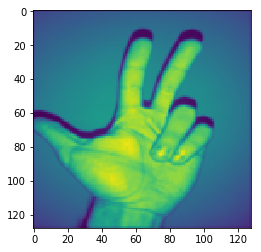

In [19]:
import matplotlib.pyplot as plt

plt.imshow(img_predict)

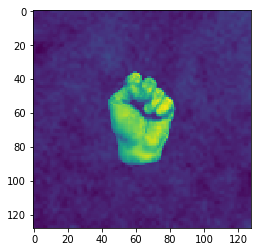

In [33]:
plt.imshow(color.rgb2grey(X_train[0]))